In [3]:
# Misc
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/kaggle-playground-machine/'

train=pd.read_csv(path+'train.csv')
original=pd.read_csv(path+"machine failure.csv")
test=pd.read_csv(path+'test.csv')
submission=pd.read_csv(path+'sample_submission.csv')


In [5]:
original.rename(columns = {'UDI':'id'}, inplace = True)
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)
original=original.drop('id',axis=1)

In [6]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Dark'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))

check_data(train, 'Train data')
print('-'*100)
check_data(test, 'Test data')
print('-'*100)
check_data(original, 'Original data')

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.600000,309.600000,1596,36.100000,140,0,0,0,0,0,0
1,M20343,M,302.600000,312.100000,1759,29.100000,200,0,0,0,0,0,0
2,L49454,L,299.300000,308.500000,1805,26.500000,25,0,0,0,0,0,0
3,L53355,L,301.000000,310.900000,1524,44.300000,197,0,0,0,0,0,0
4,M24050,M,298.000000,309.000000,1641,35.400000,34,0,0,0,0,0,0


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
Unique Value Count,9976,3,95,81,952,611,246,2,2,2,2,2,2


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L50896,L,302.300000,311.500000,1499,38.000000,60,0,0,0,0,0
1,L53866,L,301.700000,311.000000,1713,28.800000,17,0,0,0,0,0
2,L50498,L,301.300000,310.400000,1525,37.700000,96,0,0,0,0,0
3,M21232,M,300.100000,309.600000,1479,47.600000,5,0,0,0,0,0
4,M19751,M,303.400000,312.300000,1515,41.300000,114,0,0,0,0,0


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000
mean,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.003870,0.002309
std,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.062090,0.047995
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
Unique Value Count,9909,3,92,84,946,595,246,2,2,2,2,2


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M14860,M,298.100000,308.600000,1551,42.800000,0,0,0,0,0,0,0
1,L47181,L,298.200000,308.700000,1408,46.300000,3,0,0,0,0,0,0
2,L47182,L,298.100000,308.500000,1498,49.400000,5,0,0,0,0,0,0
3,L47183,L,298.200000,308.600000,1433,39.500000,7,0,0,0,0,0,0
4,L47184,L,298.200000,308.700000,1408,40.000000,9,0,0,0,0,0,0


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.001900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.043550
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
Unique Value Count,10000,3,93,82,941,577,246,2,2,2,2,2,2


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0,0,0,0,0,0,0,0


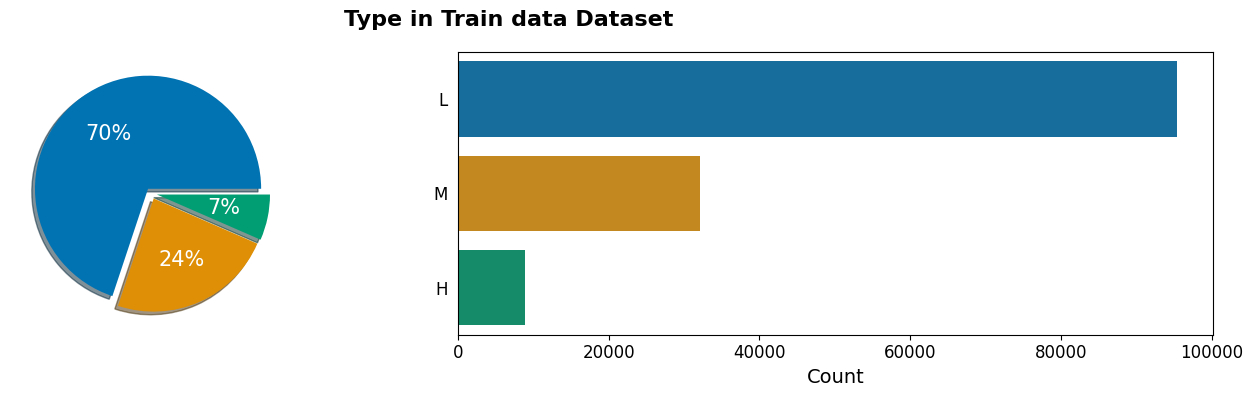

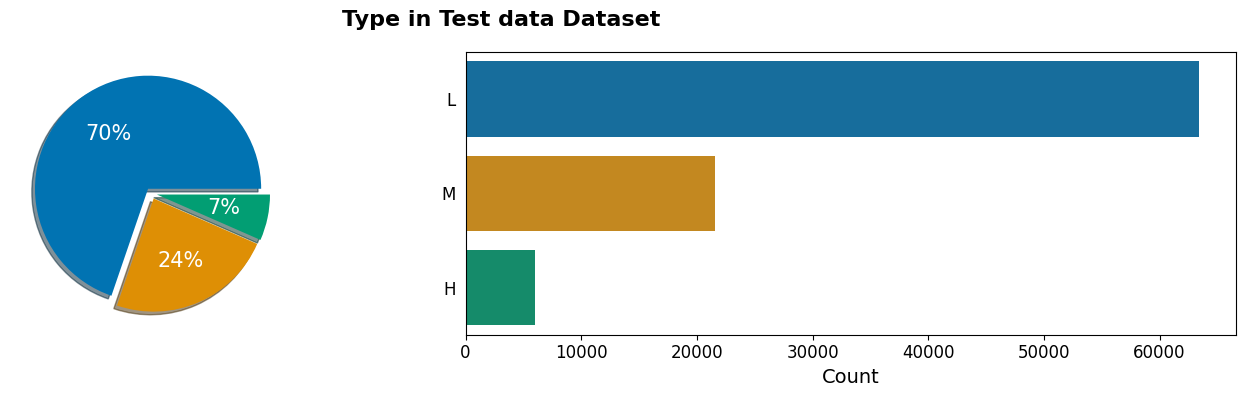

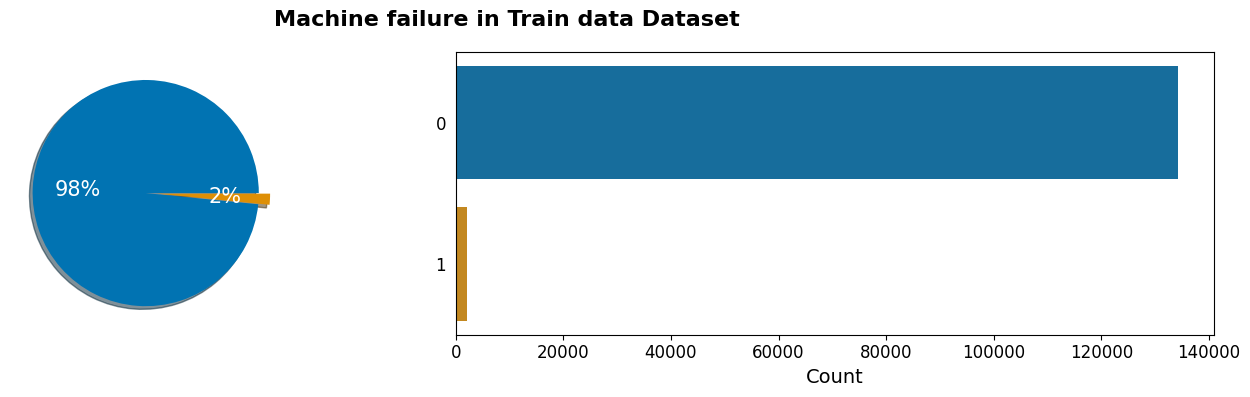

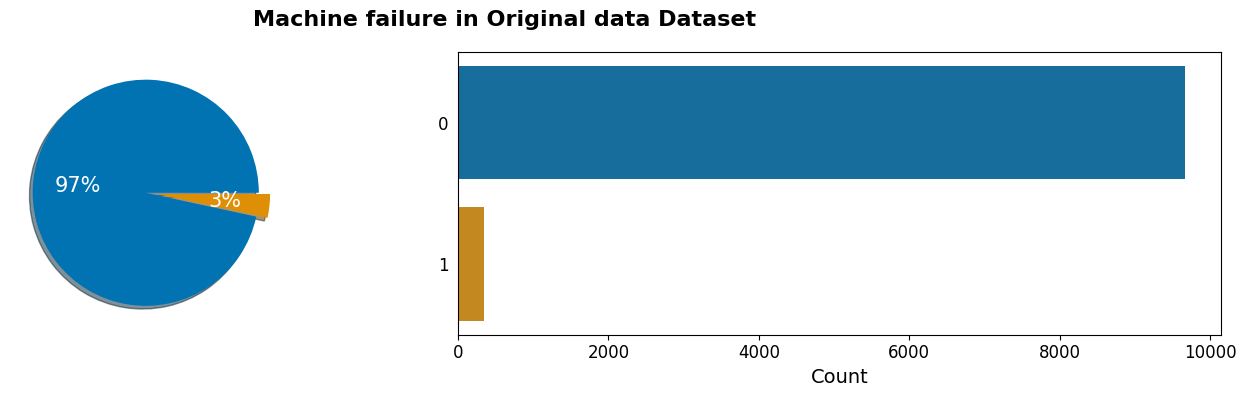

In [7]:
def plot_target_feature(df_train, target_col, figsize=(16,5), palette='colorblind', name='Train'):
    df_train = df_train.fillna('Nan')

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.flatten()

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df_train[target_col].unique()))
    ax[0].pie(
        df_train[target_col].value_counts(),
        shadow=True,
        explode=[0.05] * len(df_train[target_col].unique()),
        autopct='%1.f%%',
        textprops={'size': 15, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df_train,
        y=target_col,
        ax=ax[1],
        palette=bar_colors
    )
    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines for y-axis

    fig.suptitle(f'{target_col} in {name} Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_target_feature(train, 'Type', figsize=(15,4), palette='colorblind', name='Train data')
plot_target_feature(test, 'Type', figsize=(15,4), palette='colorblind', name='Test data')
plot_target_feature(train, 'Machine failure' , figsize=(15,4), palette='colorblind', name='Train data')
plot_target_feature(original, 'Machine failure' , figsize=(15,4), palette='colorblind', name='Original data')

<Axes: >

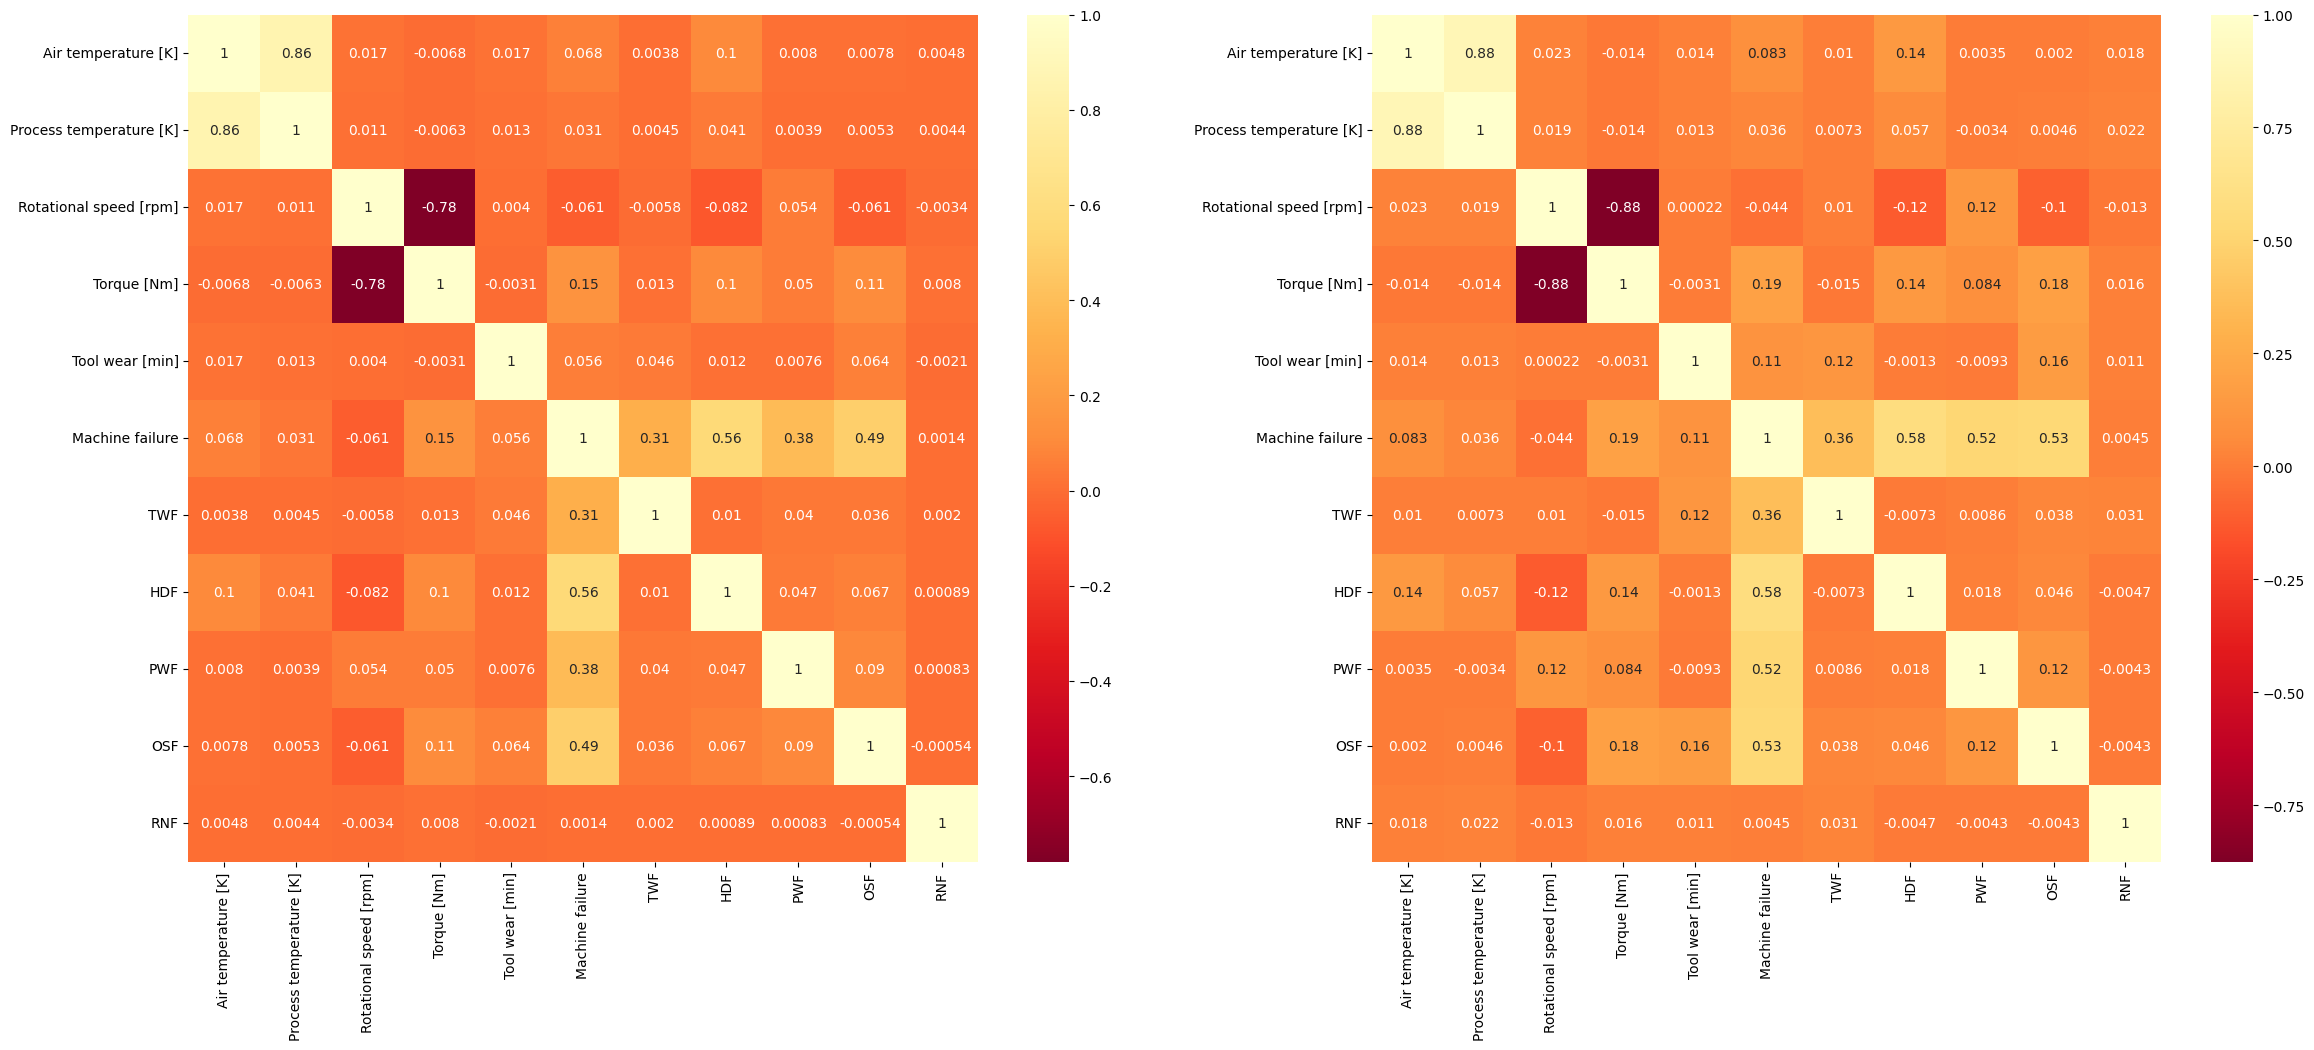

In [8]:
fig,axes=plt.subplots(1,2,figsize=(28,11))
sns.heatmap(ax=axes[0],data=train.corr(numeric_only=True),annot=True,cmap = 'YlOrRd_r')
sns.heatmap(ax=axes[1],data=original.corr(numeric_only=True),annot=True,cmap = 'YlOrRd_r')